In [1]:
#!pip install rasa rasa-sdk scikit-learn vaderSentiment matplotlib seaborn

In [2]:
import joblib  # Used for saving and loading machine learning models
import json  # Handles JSON data for API communication
import matplotlib.pyplot as plt  # Used for visualizing data and model performance
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # Provides stopwords for text preprocessing
import os  # Interacts with the operating system to access environment variables
import pandas as pd  # Data manipulation and analysis library
import re  # Regular expressions for text matching and replacement
import requests  # Used to make HTTP requests to the Flask API
from dotenv import load_dotenv  # Loads environment variables from a .env file
from flask import Flask, request, jsonify  # Flask is used to create and deploy a web API
from langchain.chains import RetrievalQA  # Constructs a retrieval-augmented generation QA model
from langchain.embeddings import HuggingFaceEmbeddings  # Generates text embeddings using HuggingFace models
from langchain.vectorstores import FAISS  # Vector storage for document retrieval in NLP tasks
from langchain_groq import ChatGroq  # Used for integrating LLM models with specific settings
from sentence_transformers import SentenceTransformer  # Pre-trained transformer models for creating text embeddings
from sklearn.cluster import KMeans  # Used for clustering the data
from sklearn.decomposition import PCA  # Used for reducing dimensionality for visualization
from sklearn.compose import ColumnTransformer  # Applies different preprocessing steps to different feature types
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Converts text data into numerical feature vectors
from sklearn.impute import SimpleImputer  # Handles missing data by filling it with specified strategies
from sklearn.linear_model import LogisticRegression  # Used to create and train a logistic regression model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay  # Tools for evaluating model performance
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Tools for splitting datasets, hyperparameter tuning, and validation
from sklearn.naive_bayes import MultinomialNB  # Used to create and train a Naive Bayes model for classification
from sklearn.pipeline import Pipeline  # Used to create a sequence of data transformations and model steps
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder  # Various encoding and scaling tools for preprocessing data
from sklearn.manifold import TSNE  # t-SNE for exploring clusters in more detail
from tqdm import tqdm  # Provides progress bars for loops
import seaborn as sns  # For enhanced data visualization
import numpy as np  # For numerical operations
from datetime import datetime  # For date and time operations
import spacy  # For NLP tasks
from transformers import pipeline, BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments  # For text generation and BERT-based tasks
import openai  # For OpenAI API
import missingno as msno  # For visualizing missing data
from nltk.stem import WordNetLemmatizer  # For lemmatization
from gensim.models import Word2Vec  # For word embedding
from sklearn.metrics.pairwise import cosine_similarity  # For cosine similarity calculations
from datasets import load_dataset  # For loading datasets from the Hugging Face Hub
from gensim import corpora  # For creating document-term matrix
from gensim.models import LdaModel  # For topic modeling
from sklearn.decomposition import LatentDirichletAllocation as LDA  # For Latent Dirichlet Allocation
from wordcloud import WordCloud  # For generating word clouds

# Loading environment variables
load_dotenv()

# Set a stylish/futuristic plot style
plt.style.use('ggplot')  # Alternatively, you can use 'seaborn-dark', 'fivethirtyeight', or custom styles

# Additional Seaborn settings for a futuristic look
sns.set_context('talk')  # Set context to make plots bolder and larger
sns.set_palette('coolwarm')  # Use a 'coolwarm' color palette for visual appeal

# Set figure size for all plots globally
plt.rcParams['figure.figsize'] = (10, 6)  # Default figure size
plt.rcParams['axes.facecolor'] = '#f4f4f4'  # Set background color of the plot area
plt.rcParams['axes.edgecolor'] = '#333F44'  # Set axis color
plt.rcParams['grid.color'] = '#dddddd'  # Set grid color
plt.rcParams['axes.titleweight'] = 'bold'  # Bold axis titles

# Customizing fonts and other details for futuristic aesthetics
plt.rcParams['font.family'] = 'monospace'  # Use monospace fonts for a tech-like feel
plt.rcParams['axes.titleweight'] = 'bold'  # Bold axis titles
plt.rcParams['axes.labelweight'] = 'bold'  # Bold axis labels
plt.rcParams['axes.labelsize'] = 12  # Set default axis label size
plt.rcParams['axes.titlesize'] = 14  # Set default title size
plt.rcParams['grid.linestyle'] = '--'  # Set grid lines to dashed for style

f:\Capstone\your_envs_directory\mlenv\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
# Rasa libraries for chatbot actions and tracking
from rasa_sdk import Action, Tracker
from rasa_sdk.executor import CollectingDispatcher

# Environment variable loader
from dotenv import load_dotenv

# Feature engineering libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Sentiment analysis library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Text processing and classification libraries
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import pickle

In [4]:
# Load the CSV file containing preprocessed job reviews
import pandas as pd

# Load the dataset
data = pd.read_csv("data/gd_rev_preprocessed.csv")

# Display the first few rows of the DataFrame to understand its structure
print(data.head())
print(data.columns)

                    firm date_review             job_title  \
0  AFH-Wealth-Management  2015-04-05                   NaN   
1  AFH-Wealth-Management  2015-12-11  office administrator   
2  AFH-Wealth-Management  2016-01-28  office administrator   
3  AFH-Wealth-Management  2016-04-16                   NaN   
4  AFH-Wealth-Management  2016-04-23  office administrator   

                              current                      location  \
0                    Current Employee                           NaN   
1  Current Employee, more than 1 year  Bromsgrove, England, England   
2  Current Employee, less than 1 year  Bromsgrove, England, England   
3                    Current Employee                           NaN   
4  Current Employee, more than 1 year  Bromsgrove, England, England   

   overall_rating  work_life_balance  culture_values  diversity_inclusion  \
0               2                4.0             3.0                  NaN   
1               2                3.0          

C:\Users\gerri\AppData\Local\Temp\ipykernel_16208\1266430859.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='viridis')


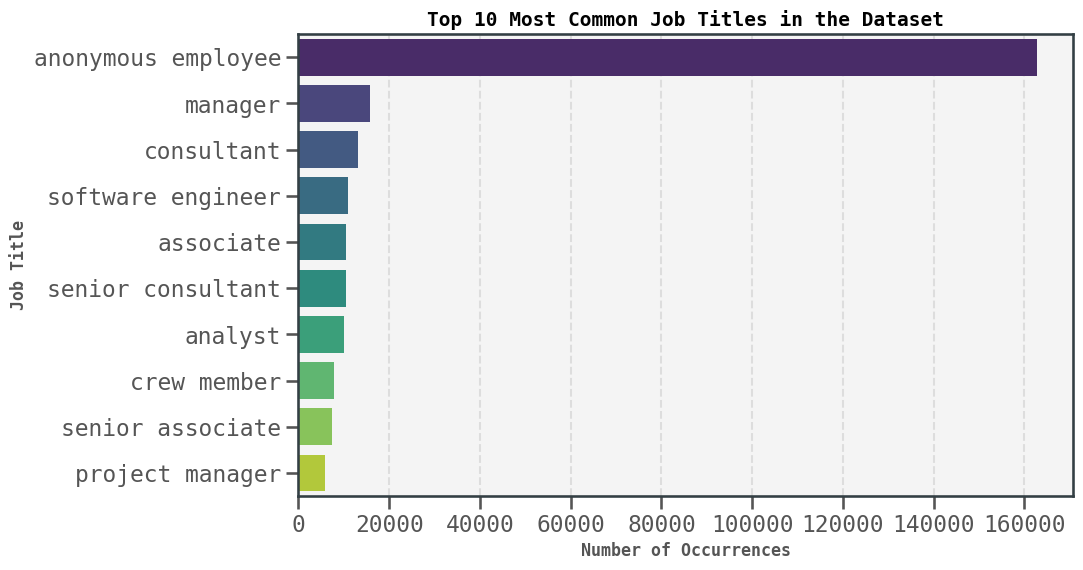

In [5]:
#### Step 4.1: Overview of Job Titles
# Count the number of occurrences of each job title
plt.figure(figsize=(10, 6))
job_title_counts = data['job_title_clean'].value_counts().head(10)
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='viridis')
plt.xlabel("Number of Occurrences")
plt.ylabel("Job Title")
plt.title("Top 10 Most Common Job Titles in the Dataset")
plt.show()

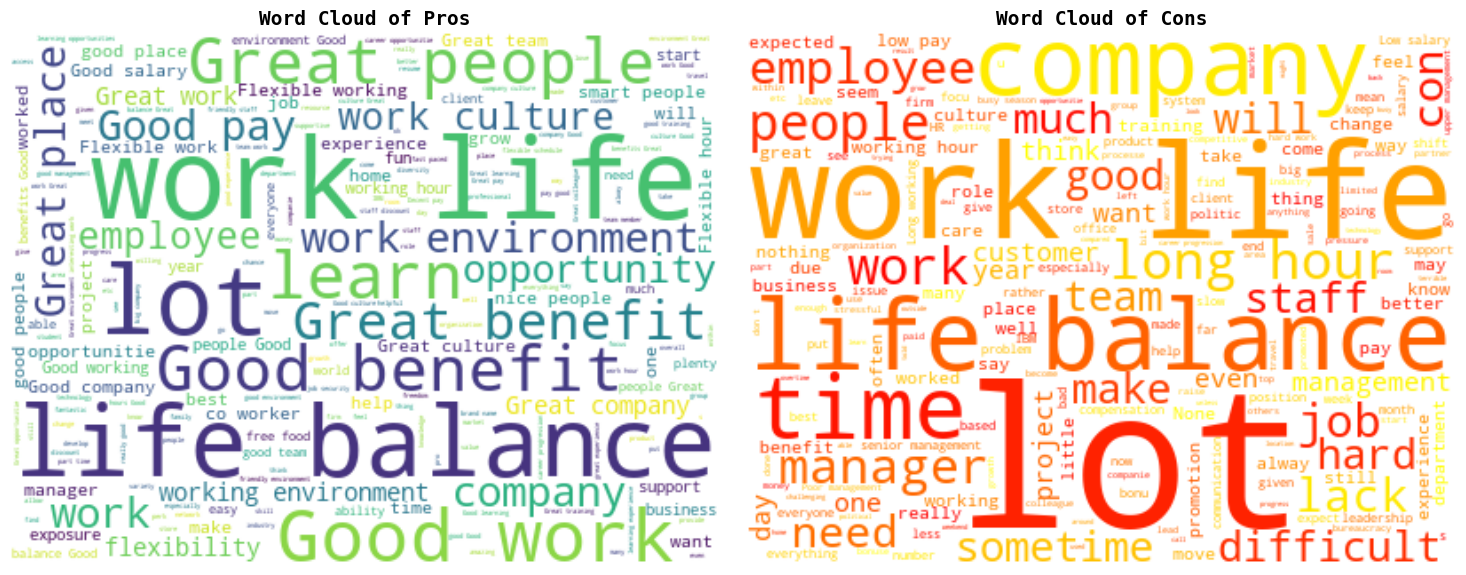

In [6]:
#### Step 4.2: Visualizing Pros and Cons
# Word cloud visualization of pros and consrom wordcloud import WordCloud

# Generate word clouds for 'pros' and 'cons'
pros_text = ' '.join(data['pros'].dropna())
cons_text = ' '.join(data['cons'].dropna())

# Plotting word clouds
plt.figure(figsize=(15, 7))

# Word Cloud for Pros
plt.subplot(1, 2, 1)
wordcloud_pros = WordCloud(width=400, height=300, background_color='white', colormap='viridis').generate(pros_text)
plt.imshow(wordcloud_pros, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Pros")

# Word Cloud for Cons
plt.subplot(1, 2, 2)
wordcloud_cons = WordCloud(width=400, height=300, background_color='white', colormap='autumn').generate(cons_text)
plt.imshow(wordcloud_cons, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cons")

plt.tight_layout()
plt.show()

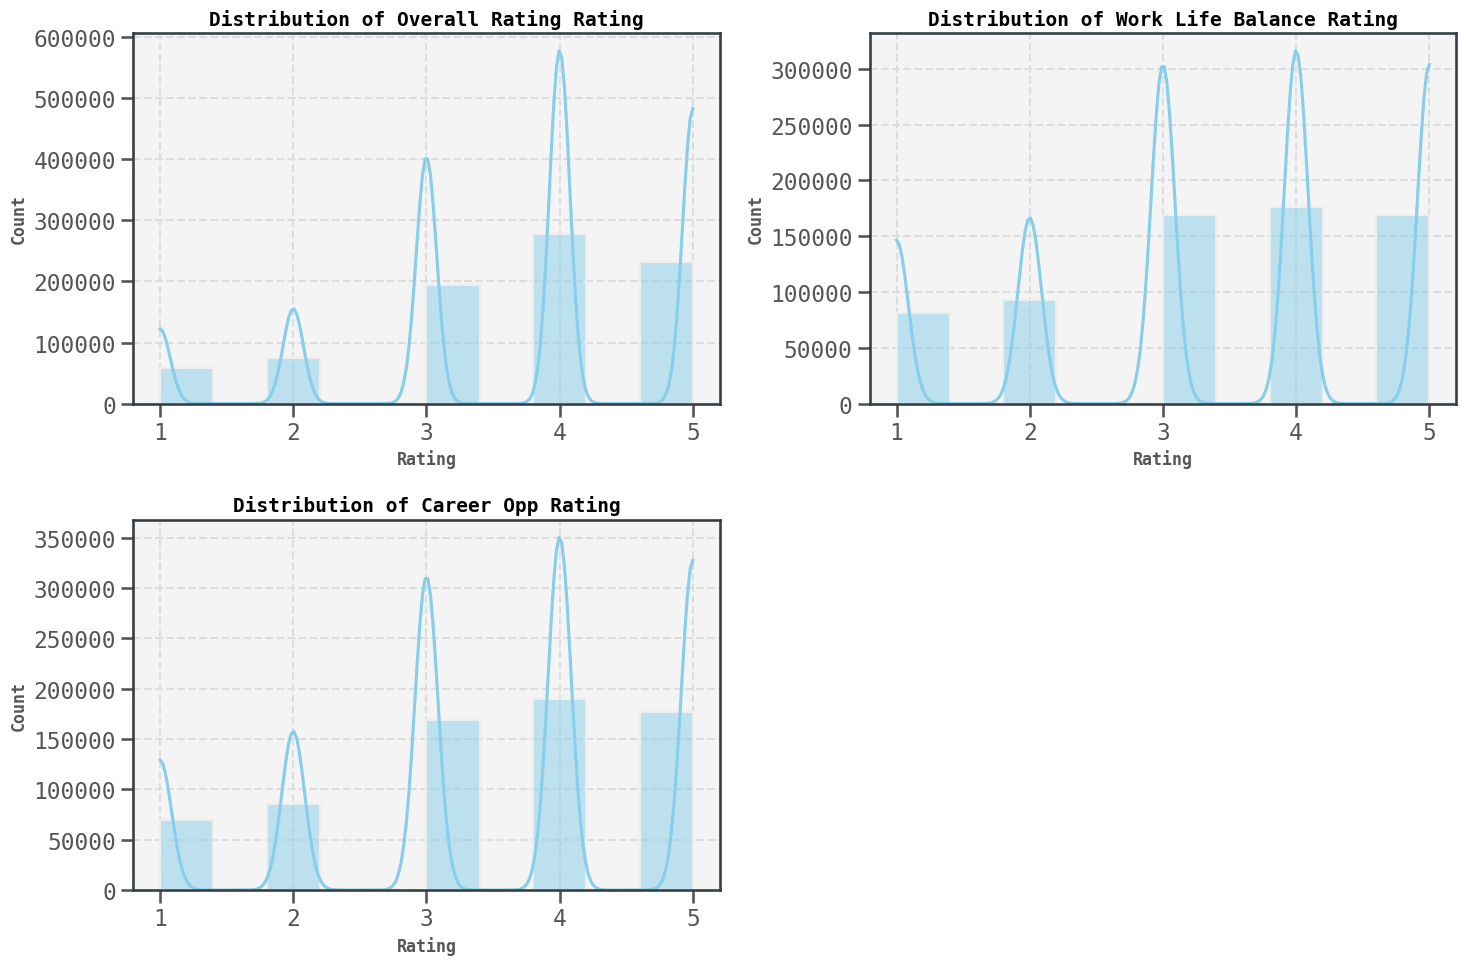

In [7]:
#### Step 4.3: Ratings Distribution
# Plotting distributions of various ratings (e.g., overall_rating, work_life_balance)
plt.figure(figsize=(15, 10))

rating_columns = ['overall_rating', 'work_life_balance', 'career_opp']
for i, column in enumerate(rating_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[column].dropna(), kde=True, bins=10, color='skyblue')
    plt.xlabel("Rating")
    plt.title(f"Distribution of {column.replace('_', ' ').title()} Rating")

plt.tight_layout()
plt.show()

### Step 5: Preparing Data for Model Training

Based on our exploration of the dataset, we will use the following columns to create a training corpus:
- **`job_title_clean`**: Cleaned job title which provides role-specific context.
- **`pros`**: Positive aspects of the job.
- **`cons`**: Negative aspects of the job.

We will create simplistic question-answer pairs to enhance the model’s capability.

In [8]:
from scipy.sparse import csr_matrix

In [9]:
# Selecting useful columns for training
job_titles = data['job_title_clean'].dropna().tolist()
pros = data['pros'].dropna().tolist()
cons = data['cons'].dropna().tolist()

# Combining different data points to create a training corpus
training_pairs = [(job, f"What are the pros of working as a {job}?") for job in job_titles]
training_pairs += [(job, f"What are the cons of working as a {job}?") for job in job_titles]

# Splitting questions and responses
questions, responses = zip(*training_pairs)

# Vectorizing the questions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(questions)

# Convert to sparse format to save memory
X_sparse = csr_matrix(X)

### Step 6: Dimensionality Reduction to Avoid Memory Errors

#### Step 6.1: Using PCA to Reduce Dimensionality

To handle memory limitations, we will reduce the dimensionality of our feature space using **PCA**.


In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import HashingVectorizer


In [11]:
svd = TruncatedSVD(n_components=50)
X_reduced = svd.fit_transform(X_sparse)

!!!Make sure to adjust the n_components to find the best balance between size and performance!!!

Adding more sub-steps such as Feature Normalization and Sparse Representation Check could indeed have a positive effect:

Feature Normalization:

After applying PCA, normalization can ensure that each feature contributes equally to the model. This is particularly useful if the reduced components still have varying scales. It can enhance model convergence, stability, and improve overall training efficiency.
Sparse Representation Check:

If the PCA components still contain a lot of zeros, converting the resulting data into a sparse format can help conserve memory and speed up computations in later stages. It could reduce the likelihood of hitting memory limitations again.

### Step 7: Training the Model in Batches

Due to the size of the dataset, we will use **batch training** to avoid memory errors.

#### Step 7.1: Batch Training with Naive Bayes


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle


In [13]:
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier

# Shuffle the data to ensure randomness
X_reduced, responses = shuffle(X_reduced, responses, random_state=42)

# Define batch size
batch_size = 10000  # Adjust as necessary based on available memory
n_batches = len(X_reduced) // batch_size

# Initialize the Naive Bayes model
model = SGDClassifier()

# Train the model in batches
for i in tqdm(range(n_batches), desc='Training in Batches'):
    start = i * batch_size
    end = start + batch_size
    model.partial_fit(X_reduced[start:end], responses[start:end], classes=np.unique(responses))

Training in Batches: 100%|██████████| 151/151 [8:44:30<00:00, 208.41s/it]  


### Step 8: Model Evaluation

After updating our model to use a reduced feature space, we must evaluate it using the same metrics as before.

#### Step 8.1: Split Data for Evaluation

In [14]:
from sklearn.model_selection import train_test_split

# Split the reduced dataset into training and testing sets with progress bar
with tqdm(total=1, desc='Splitting Data') as pbar:
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, responses, test_size=0.2, random_state=42)
    pbar.update(1)

Splitting Data: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


In [15]:
#### Step 8.2: Train Model on Training Data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model on training data with progress bar
with tqdm(total=1, desc='Training Model') as pbar:
    model.fit(X_train, y_train)
    pbar.update(1)

Training Model:   0%|          | 0/1 [14:53:20<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#### Step 8.3: Making Predictions
# Make predictions on the test data
with tqdm(total=1, desc='Making Predictions') as pbar:
    y_pred = model.predict(X_test)
    pbar.update(1)

In [ ]:
#### Step 8.4: Calculating Evaluation Metrics
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

### Explanation of the Custom Action
1. **Loading Model and Vectorizer**:
   - The `__init__()` method loads the previously trained model and vectorizer using `pickle`.

2. **Extracting User Input**:
   - The `run()` method extracts the job role specified by the user and checks if it is provided.
   - **Alternatives**: Extract multiple slots like job location or experience if needed.

3. **Text Cleaning with Regex**:
   - `re.sub()` is used to clean the input.
   - **Alternatives**: `nltk` could be used for more advanced text cleaning.

4. **Vectorizing and Prediction**:
   - The cleaned job role is vectorized and used as input to the trained model to generate a follow-up question.
   - **Alternatives**: Embedding-based models for richer semantic understanding.

5. **Sentiment Analysis**:
   - Sentiment analysis is performed to ensure that the generated response maintains a positive and professional tone.
   - **Alternatives**: Use more advanced sentiment models like BERT or DistilBERT for better performance.

### Summary
This chatbot provides a hybrid approach using rule-based Rasa components and a locally trained NLP model to generate follow-up questions. The steps involve installing necessary packages, importing key libraries, training a model with sample data, and using custom actions to generate dynamic responses. By using local models, we avoid relying on external LLMs, providing a privacy-preserving and cost-effective solution. Let me know if you need further customization or additional functionalities!